# Median deviation of high/low daily values used as indicator for short-term price movement of Bitcoin.


### The method we use includes calculating the deviation from the 30 days median of each data point for high and low daily values and using the difference between them as an indicator for short-therm price movements.

#### First - the code:

In [16]:
#importing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sn

#loading the data
data = pd.read_csv('Bitcoin_daily_21-5-2017_20-5-2018.csv')

### Lets have a look at our data

In [21]:
data.head(10)

,Date,Open,High,Low,Close,Volume,Market Cap
0,20-May-18,8246.99,8562.41,8205.24,8513.25,5191060000,1.405560e+11
1,19-May-18,8255.73,8372.06,8183.35,8247.18,4712400000,1.406890e+11
2,18-May-18,8091.83,8274.12,7974.82,8250.97,5764190000,1.378810e+11
3,17-May-18,8370.05,8445.54,8054.12,8094.32,5862530000,1.426080e+11
4,16-May-18,8504.41,8508.43,8175.49,8368.83,6760220000,1.448780e+11
5,15-May-18,8705.19,8836.19,8456.45,8510.38,6705710000,1.482830e+11
6,14-May-18,8713.10,8881.12,8367.97,8716.79,7364150000,1.484030e+11
7,13-May-18,8515.49,8773.55,8395.12,8723.94,5866380000,1.450220e+11
8,12-May-18,8441.44,8664.86,8223.50,8504.89,6821380000,1.437430e+11
9,11-May-18,9052.96,9052.96,8394.46,8441.49,8488520000,1.541420e+11


In [18]:
#median calculating function
def calculate_medians(data, period):
    medians = []
    for ii in range(0,len(data)-period):
        md = np.median(data[ii:ii+period])
        medians.append(((data[ii]-md)/md)*100)
    return medians

In [19]:
#we are going to use 30 days period
period = 30

#preparing the data
medians_high = calculate_medians(data.High,period)
medians_low = calculate_medians(data.Low,period)
close = np.array(data['Close'][:-period])
dates = pd.to_datetime(data['Date'][:-period])

Text(0.5,1,'Median deviation of Bitcoin')

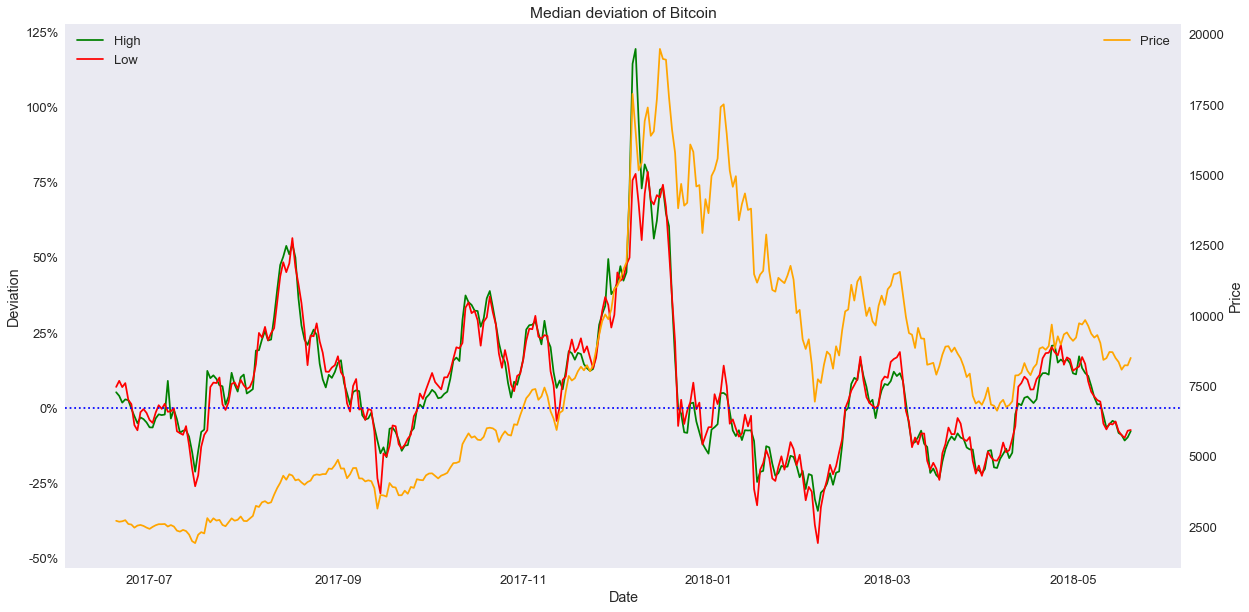

In [37]:
#plotting
sn.set(font_scale=1.3)
sn.set_style('dark')

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(dates, medians_high, label='High',c='g')
ax.plot(dates, medians_low, label='Low',c='r')

ax2 =ax.twinx()
ax2.plot(dates,close, c='orange', label='Price')

sn.despine(ax=ax, right=True, left=True)
sn.despine(ax=ax2, left=False, right=False)
ax2.spines['right'].set_color('orange')
ax.legend(loc=2)
ax2.legend()

ax.yaxis.set_major_formatter(PercentFormatter())
ax.axhline(y=0, color='b', linestyle=':')

ax.set_xlabel('Date')
ax.set_ylabel('Deviation')
ax2.set_ylabel('Price')
ax.set_title('Median deviation of Bitcoin')


### When we get <b>Low</b> deviation (red line) significantly higher than <b>High</b> deviation (green line) we would expect the <b>Price</b>(orange line) to move in negative direction.

### The way this indicator works in by detecting overbought and oversold conditions without takin in account the volume. It is similar to RSI.

***
This indicator is not properly tested and it should be viewed as an excesise in data analysis, not a trading strategy.